# SARA

In [14]:
# import dependencies
import requests
import json
import pandas as pd

# Import Bureau of Labor Statistics API Key
from api_keys import census_api_key

# Replace 'YOUR_API_KEY' with your actual census API key
API_KEY = census_api_key
state = 'state:01,02,04,05,06,08,09,10,11,12,13,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,44,45,46,47,48,49,50,51,53,54,55,56'

#URL
family_size_2022_url = f'https://api.census.gov/data/2022/acs/acs1?get=NAME,group(B11001)&for={state}&key={census_api_key}'
family_size_2021_url = f'https://api.census.gov/data/2021/acs/acs1?get=NAME,group(B11001)&for={state}&key={census_api_key}'
family_size_2019_url = f'https://api.census.gov/data/2019/acs/acs1?get=NAME,group(B11001)&for={state}&key={census_api_key}'
family_size_2018_url = f'https://api.census.gov/data/2018/acs/acs1?get=NAME,group(B11001)&for={state}&key={census_api_key}'
family_size_2017_url = f'https://api.census.gov/data/2017/acs/acs1?get=NAME,group(B11001)&for={state}&key={census_api_key}'


print(f'2022 Family Size URL: {family_size_2022_url}\n')
print(f'2021 Family Size URL: {family_size_2021_url}\n')
print(f'2019 Family Size URL: {family_size_2019_url}\n')
print(f'2018 Family Size URL: {family_size_2018_url}\n')
print(f'2017 Family Size URL: {family_size_2017_url}\n')

family_size_2022_json = requests.get(family_size_2022_url).json()
family_size_2021_json = requests.get(family_size_2021_url).json()
family_size_2019_json = requests.get(family_size_2019_url).json()
family_size_2018_json = requests.get(family_size_2018_url).json()
family_size_2017_json = requests.get(family_size_2017_url).json()


2022 Family Size URL: https://api.census.gov/data/2022/acs/acs1?get=NAME,group(B11001)&for=state:01,02,04,05,06,08,09,10,11,12,13,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,44,45,46,47,48,49,50,51,53,54,55,56&key=9935e2b9b55f7614cfb428d835eb415fddc4e2f1

2021 Family Size URL: https://api.census.gov/data/2021/acs/acs1?get=NAME,group(B11001)&for=state:01,02,04,05,06,08,09,10,11,12,13,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,44,45,46,47,48,49,50,51,53,54,55,56&key=9935e2b9b55f7614cfb428d835eb415fddc4e2f1

2019 Family Size URL: https://api.census.gov/data/2019/acs/acs1?get=NAME,group(B11001)&for=state:01,02,04,05,06,08,09,10,11,12,13,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,44,45,46,47,48,49,50,51,53,54,55,56&key=9935e2b9b55f7614cfb428d835eb415fddc4e2f1

2018 Family Size URL: https://api.census.gov/data/2018/acs/acs1?get=NAME,group(B11001)&for=state:01,02,04,05,06,

In [15]:
family_size_2022_df = pd.DataFrame(requests.get(family_size_2022_url).json()[1:], columns=requests.get(family_size_2022_url).json()[0])

family_size_2022_df_cleaned = family_size_2022_df.rename(columns={
    'NAME': 'State',
    'B11001_001E': 'Estimated Total Household Type(Including Living Alone)',
    'B11001_003E': 'Estimated Total Family Households(Married Couples)',
    'B11001_005E': 'Estimated Total Family Households(Male Householder No Spouse)',
    'B11001_006E': 'Estimated Total Family Households(Female Householder No Spouse)',
    'B11001_007E': 'Estimated Total Family Household(Nonfamily Households)',
    'B11001_008E': 'Estimated Total Family Household(Householder Living Alone)'
})

family_size_2022_df_final = family_size_2022_df_cleaned[[
    'State',
    'Estimated Total Household Type(Including Living Alone)',
    'Estimated Total Family Households(Married Couples)',
    'Estimated Total Family Households(Male Householder No Spouse)',
    'Estimated Total Family Households(Female Householder No Spouse)',
    'Estimated Total Family Household(Nonfamily Households)',
    'Estimated Total Family Household(Householder Living Alone)'
]]


#remove duplicate NAME column
family_size_2022_df_final = family_size_2022_df_final.loc[:, ~family_size_2022_df_final.columns.duplicated()]

# Add a column for the year
family_size_2022_df_final['Year'] = 2022

#table output
print('\n 2022 Household Family Size\n')
family_size_2022_df_final.head()



 2022 Household Family Size



,State,Estimated Total Household Type(Including Living Alone),Estimated Total Family Households(Married Couples),Estimated Total Family Households(Male Householder No Spouse),Estimated Total Family Households(Female Householder No Spouse),Estimated Total Family Household(Nonfamily Households),Estimated Total Family Household(Householder Living Alone),Year
0,Alabama,2016448,941596,90528,276864,707460,612711,2022
1,Alaska,274574,129511,17440,28838,98785,76356,2022
2,Arizona,2850377,1332270,174058,337202,1006847,775093,2022
3,Arkansas,1216207,572596,57647,147690,438274,374526,2022
4,California,13550586,6516115,870396,1764293,4399782,3296939,2022


In [16]:
family_size_2021_df = pd.DataFrame(requests.get(family_size_2021_url).json()[1:], columns=requests.get(family_size_2021_url).json()[0])

family_size_2021_df_cleaned = family_size_2021_df.rename(columns={
    'NAME': 'State',
    'B11001_001E': 'Estimated Total Household Type(Including Living Alone)',
    'B11001_003E': 'Estimated Total Family Households(Married Couples)',
    'B11001_005E': 'Estimated Total Family Households(Male Householder No Spouse)',
    'B11001_006E': 'Estimated Total Family Households(Female Householder No Spouse)',
    'B11001_007E': 'Estimated Total Family Household(Nonfamily Households)',
    'B11001_008E': 'Estimated Total Family Household(Householder Living Alone)'
})

family_size_2021_df_final = family_size_2021_df_cleaned[[
    'State',
    'Estimated Total Household Type(Including Living Alone)',
    'Estimated Total Family Households(Married Couples)',
    'Estimated Total Family Households(Male Householder No Spouse)',
    'Estimated Total Family Households(Female Householder No Spouse)',
    'Estimated Total Family Household(Nonfamily Households)',
    'Estimated Total Family Household(Householder Living Alone)'
]]


#remove duplicate NAME column
family_size_2021_df_final = family_size_2021_df_final.loc[:, ~family_size_2021_df_final.columns.duplicated()]

# Add a column for the year
family_size_2021_df_final['Year'] = 2021

#table output
print('\n 2021 Household Family Size\n')
family_size_2021_df_final.head()


 2021 Household Family Size



,State,Estimated Total Household Type(Including Living Alone),Estimated Total Family Households(Married Couples),Estimated Total Family Households(Male Householder No Spouse),Estimated Total Family Households(Female Householder No Spouse),Estimated Total Family Household(Nonfamily Households),Estimated Total Family Household(Householder Living Alone),Year
0,Alabama,1967559,904392,90366,276625,696176,607180,2021
1,Arizona,2817723,1344242,163839,338277,971365,741675,2021
2,Arkansas,1183675,565893,59813,151925,406044,339397,2021
3,California,13429063,6517082,864894,1764642,4282445,3218519,2021
4,Colorado,2313042,1124072,107081,217502,864387,644981,2021


In [17]:
family_size_2019_df = pd.DataFrame(requests.get(family_size_2019_url).json()[1:], columns=requests.get(family_size_2019_url).json()[0])

family_size_2019_df_cleaned = family_size_2019_df.rename(columns={
    'NAME': 'State',
    'B11001_001E': 'Estimated Total Household Type(Including Living Alone)',
    'B11001_003E': 'Estimated Total Family Households(Married Couples)',
    'B11001_005E': 'Estimated Total Family Households(Male Householder No Spouse)',
    'B11001_006E': 'Estimated Total Family Households(Female Householder No Spouse)',
    'B11001_007E': 'Estimated Total Family Household(Nonfamily Households)',
    'B11001_008E': 'Estimated Total Family Household(Householder Living Alone)'
})

family_size_2019_df_final = family_size_2019_df_cleaned[[
    'State',
    'Estimated Total Household Type(Including Living Alone)',
    'Estimated Total Family Households(Married Couples)',
    'Estimated Total Family Households(Male Householder No Spouse)',
    'Estimated Total Family Households(Female Householder No Spouse)',
    'Estimated Total Family Household(Nonfamily Households)',
    'Estimated Total Family Household(Householder Living Alone)'
]]


#remove duplicate NAME column
family_size_2019_df_final = family_size_2019_df_final.loc[:, ~family_size_2019_df_final.columns.duplicated()]

# Add a column for the year
family_size_2019_df_final['Year'] = 2019

#table output
print('\n 2019 Household Family Size\n')
family_size_2019_df_final.head()


 2019 Household Family Size



,State,Estimated Total Household Type(Including Living Alone),Estimated Total Family Households(Married Couples),Estimated Total Family Households(Male Householder No Spouse),Estimated Total Family Households(Female Householder No Spouse),Estimated Total Family Household(Nonfamily Households),Estimated Total Family Household(Householder Living Alone),Year
0,Illinois,4866006,2251401,228645,579021,1806939,1497316,2019
1,Georgia,3852714,1802484,184858,568098,1297274,1078622,2019
2,Idaho,655859,357453,30832,60694,206880,161580,2019
3,Hawaii,465299,232024,25886,58296,149093,117299,2019
4,Indiana,2597765,1221373,131391,286466,958535,789156,2019


In [18]:
family_size_2018_df = pd.DataFrame(requests.get(family_size_2018_url).json()[1:], columns=requests.get(family_size_2018_url).json()[0])

family_size_2018_df_cleaned = family_size_2018_df.rename(columns={
    'NAME': 'State',
    'B11001_001E': 'Estimated Total Household Type(Including Living Alone)',
    'B11001_003E': 'Estimated Total Family Households(Married Couples)',
    'B11001_005E': 'Estimated Total Family Households(Male Householder No Spouse)',
    'B11001_006E': 'Estimated Total Family Households(Female Householder No Spouse)',
    'B11001_007E': 'Estimated Total Family Household(Nonfamily Households)',
    'B11001_008E': 'Estimated Total Family Household(Householder Living Alone)'
})

family_size_2018_df_final = family_size_2018_df_cleaned[[
    'State',
    'Estimated Total Household Type(Including Living Alone)',
    'Estimated Total Family Households(Married Couples)',
    'Estimated Total Family Households(Male Householder No Spouse)',
    'Estimated Total Family Households(Female Householder No Spouse)',
    'Estimated Total Family Household(Nonfamily Households)',
    'Estimated Total Family Household(Householder Living Alone)'
]]


#remove duplicate NAME column
family_size_2018_df_final = family_size_2018_df_final.loc[:, ~family_size_2018_df_final.columns.duplicated()]

# Add a column for the year
family_size_2018_df_final['Year'] = 2018

#table output
print('\n 2018 Household Family Size\n')
family_size_2018_df_final.head()


 2018 Household Family Size



,State,Estimated Total Household Type(Including Living Alone),Estimated Total Family Households(Married Couples),Estimated Total Family Households(Male Householder No Spouse),Estimated Total Family Households(Female Householder No Spouse),Estimated Total Family Household(Nonfamily Households),Estimated Total Family Household(Householder Living Alone),Year
0,Alabama,1855184,879227,77949,257618,640390,555330,2018
1,Alaska,254551,127824,15613,24090,87024,66253,2018
2,Arizona,2614298,1247270,151694,314042,901292,704852,2018
3,Arkansas,1156347,553461,57646,158027,387213,325971,2018
4,California,13072122,6458423,791114,1685084,4137501,3133413,2018


In [19]:
family_size_2017_df = pd.DataFrame(requests.get(family_size_2017_url).json()[1:], columns=requests.get(family_size_2017_url).json()[0])

family_size_2017_df_cleaned = family_size_2017_df.rename(columns={
    'NAME': 'State',
    'B11001_001E': 'Estimated Total Household Type(Including Living Alone)',
    'B11001_003E': 'Estimated Total Family Households(Married Couples)',
    'B11001_005E': 'Estimated Total Family Households(Male Householder No Spouse)',
    'B11001_006E': 'Estimated Total Family Households(Female Householder No Spouse)',
    'B11001_007E': 'Estimated Total Family Household(Nonfamily Households)',
    'B11001_008E': 'Estimated Total Family Household(Householder Living Alone)'
})

family_size_2017_df_final = family_size_2017_df_cleaned[[
    'State',
    'Estimated Total Household Type(Including Living Alone)',
    'Estimated Total Family Households(Married Couples)',
    'Estimated Total Family Households(Male Householder No Spouse)',
    'Estimated Total Family Households(Female Householder No Spouse)',
    'Estimated Total Family Household(Nonfamily Households)',
    'Estimated Total Family Household(Householder Living Alone)'
]]


#remove duplicate NAME column
family_size_2017_df_final = family_size_2017_df_final.loc[:, ~family_size_2017_df_final.columns.duplicated()]

# Add a column for the year
family_size_2017_df_final['Year'] = 2017

#table output
print('\n 2017 Household Family Size\n')
family_size_2017_df_final.head()


 2017 Household Family Size



,State,Estimated Total Household Type(Including Living Alone),Estimated Total Family Households(Married Couples),Estimated Total Family Households(Male Householder No Spouse),Estimated Total Family Households(Female Householder No Spouse),Estimated Total Family Household(Nonfamily Households),Estimated Total Family Household(Householder Living Alone),Year
0,Mississippi,1091980,482684,54881,178886,375529,327330,2017
1,Missouri,2385135,1138262,109918,279080,857875,702802,2017
2,Montana,423091,213118,17119,32489,160365,128489,2017
3,Nebraska,754490,384345,33470,67174,269501,220493,2017
4,Nevada,1094613,491128,66875,142446,394164,307721,2017


Combined Dataframes

In [20]:
#combine dataframes
combined_family_size_df = pd.concat([family_size_2022_df_final,
                                    family_size_2021_df_final,
                                    family_size_2019_df_final,
                                    family_size_2018_df_final,
                                    family_size_2017_df_final],
                                    axis=0)

combined_family_size_df.reset_index(drop=True, inplace=True)

#csv output
combined_family_size_df.to_csv('Data/combined_family_size_data.csv')

combined_family_size_df

,State,Estimated Total Household Type(Including Living Alone),Estimated Total Family Households(Married Couples),Estimated Total Family Households(Male Householder No Spouse),Estimated Total Family Households(Female Householder No Spouse),Estimated Total Family Household(Nonfamily Households),Estimated Total Family Household(Householder Living Alone),Year
0,Alabama,2016448,941596,90528,276864,707460,612711,2022
1,Alaska,274574,129511,17440,28838,98785,76356,2022
2,Arizona,2850377,1332270,174058,337202,1006847,775093,2022
3,Arkansas,1216207,572596,57647,147690,438274,374526,2022
4,California,13550586,6516115,870396,1764293,4399782,3296939,2022
...,...,...,...,...,...,...,...,...
250,Maine,540959,263878,21476,44752,210853,164809,2017
251,Maryland,2207343,1052297,104699,312834,737513,605688,2017
252,Massachusetts,2604954,1223401,111658,317155,952740,745478,2017
253,Michigan,3930017,1856750,189558,471695,1412014,1162080,2017


In [21]:
# Read Drug Overdose Data File opioid_death_counts.csv and store into Pandas DataFrames
import pandas as pd
file_path = 'Data/opioid_death_counts.csv'
opioid_death_counts_df = pd.read_csv(file_path)

opioid_death_counts_df

,Year,State,Total Opioid Deaths
0,2017,Alabama,0.000000
1,2017,Alaska,92.500000
2,2017,Arizona,886.857143
3,2017,Arkansas,0.000000
4,2017,California,0.000000
...,...,...,...
235,2022,Virginia,2126.750000
236,2022,Washington,1819.833333
237,2022,West Virginia,1154.833333
238,2022,Wisconsin,1469.833333


In [22]:
# Merge Drug Overdose Dataframe and Family Size Dataframe
merged_opioid_family_size = pd.merge(combined_family_size_df, opioid_death_counts_df, on=['Year', 'State'])
merged_opioid_family_size

,State,Estimated Total Household Type(Including Living Alone),Estimated Total Family Households(Married Couples),Estimated Total Family Households(Male Householder No Spouse),Estimated Total Family Households(Female Householder No Spouse),Estimated Total Family Household(Nonfamily Households),Estimated Total Family Household(Householder Living Alone),Year,Total Opioid Deaths
0,Alabama,2016448,941596,90528,276864,707460,612711,2022,1015.777778
1,Alaska,274574,129511,17440,28838,98785,76356,2022,185.583333
2,Arizona,2850377,1332270,174058,337202,1006847,775093,2022,1983.250000
3,Arkansas,1216207,572596,57647,147690,438274,374526,2022,387.833333
4,California,13550586,6516115,870396,1764293,4399782,3296939,2022,7705.583333
...,...,...,...,...,...,...,...,...,...
235,Maine,540959,263878,21476,44752,210853,164809,2017,322.916667
236,Maryland,2207343,1052297,104699,312834,737513,605688,2017,2017.500000
237,Massachusetts,2604954,1223401,111658,317155,952740,745478,2017,1911.333333
238,Michigan,3930017,1856750,189558,471695,1412014,1162080,2017,0.000000


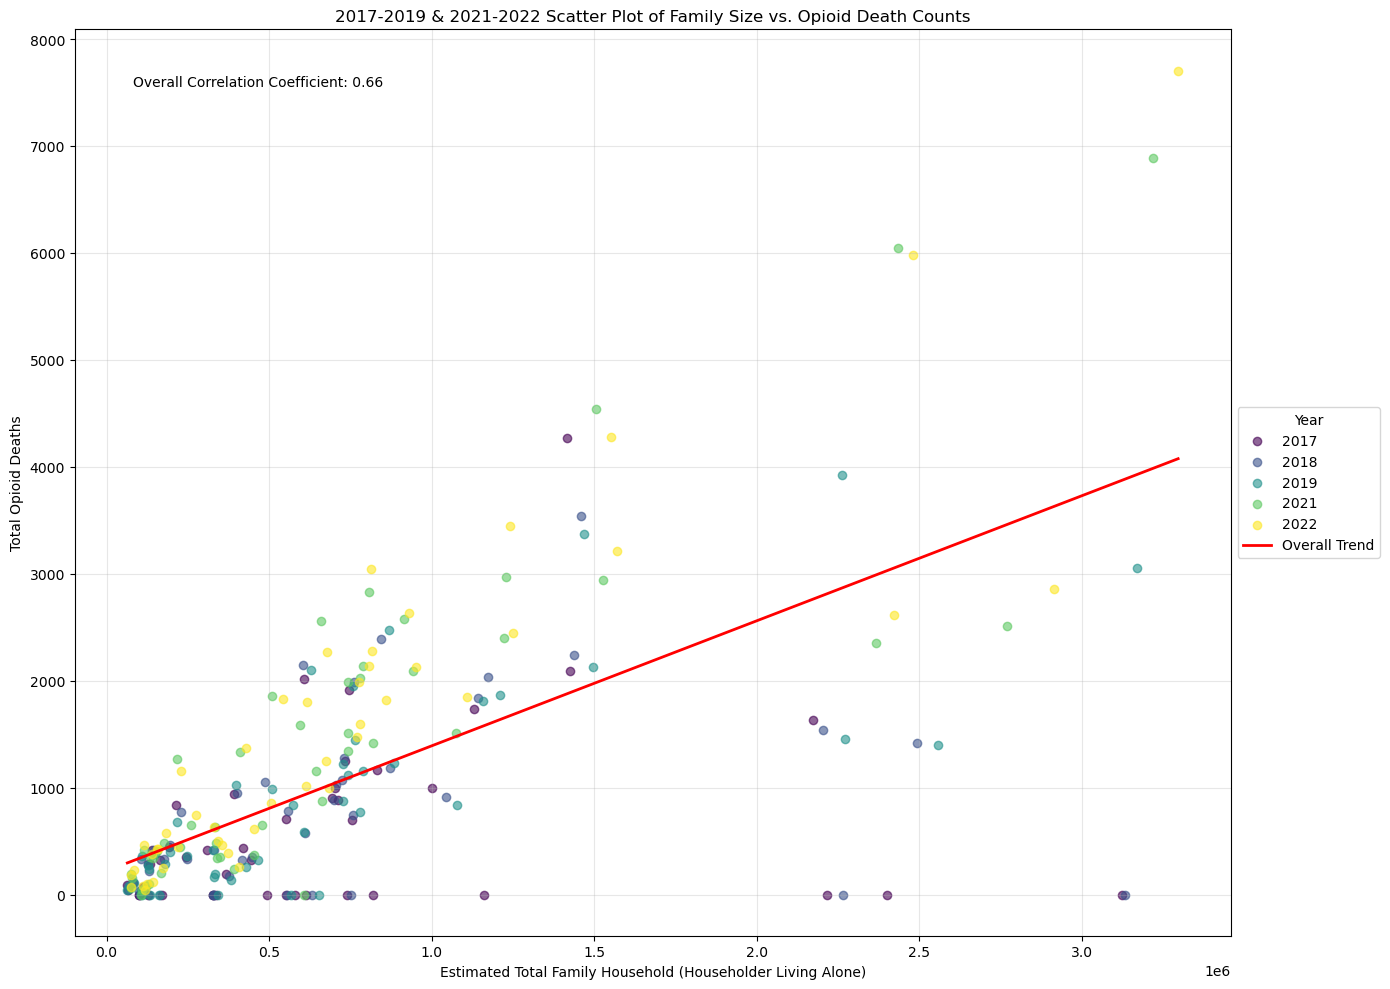

                             OLS Regression Results                            
Dep. Variable:     Total Opioid Deaths   R-squared:                       0.440
Model:                             OLS   Adj. R-squared:                  0.437
Method:                  Least Squares   F-statistic:                     186.8
Date:                 Fri, 16 Aug 2024   Prob (F-statistic):           8.89e-32
Time:                         15:13:52   Log-Likelihood:                -1977.2
No. Observations:                  240   AIC:                             3958.
Df Residuals:                      238   BIC:                             3965.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
 
# Assuming merged_opioid_family_size is your DataFrame
# If it's not defined, you need to load your data first
 
# Convert columns to numeric, handling any non-numeric values
merged_opioid_family_size['Estimated Total Family Household(Householder Living Alone)'] = pd.to_numeric(
    merged_opioid_family_size['Estimated Total Family Household(Householder Living Alone)'], errors='coerce')
merged_opioid_family_size['Total Opioid Deaths'] = pd.to_numeric(
    merged_opioid_family_size['Total Opioid Deaths'], errors='coerce')
 
# Remove any rows with NaN values
merged_opioid_family_size = merged_opioid_family_size.dropna(subset=[
    'Estimated Total Family Household(Householder Living Alone)', 'Total Opioid Deaths', 'Year'])
 
# Create a scatter plot
plt.figure(figsize=(14, 10))

# Define a color map for the years
years = sorted(merged_opioid_family_size['Year'].unique())
colors = plt.cm.viridis(np.linspace(0, 1, len(years)))
 
# Plot data points for each year
for year, color in zip(years, colors):
    data = merged_opioid_family_size[merged_opioid_family_size['Year'] == year]
    plt.scatter(data['Estimated Total Family Household(Householder Living Alone)'], 
                data['Total Opioid Deaths'], 
                alpha=0.6, 
                label=str(year),
                color=color)
 
# Define the independent variable (X) and dependent variable (y) for the overall trend
X = merged_opioid_family_size['Estimated Total Family Household(Householder Living Alone)']
y = merged_opioid_family_size['Total Opioid Deaths']
 
# Add a constant to the independent variable (for the intercept)
X = sm.add_constant(X)
 
# Fit the regression model
model = sm.OLS(y, X).fit()
 
# Get the predicted values for the regression line
predictions = model.predict(X)
 
# Sort the values for proper plotting
sorted_idx = X['Estimated Total Family Household(Householder Living Alone)'].argsort()
X_sorted = X.iloc[sorted_idx]
predictions_sorted = predictions.iloc[sorted_idx]
 
# Plot the overall regression line
plt.plot(X_sorted['Estimated Total Family Household(Householder Living Alone)'], 
         predictions_sorted, color='red', label='Overall Trend', linewidth=2)
 
# Calculate overall correlation coefficient
corr_coef, _ = stats.pearsonr(merged_opioid_family_size['Estimated Total Family Household(Householder Living Alone)'], 
                              merged_opioid_family_size['Total Opioid Deaths'])
 
# Customize the plot
plt.title('2017-2019 & 2021-2022 Scatter Plot of Family Size vs. Opioid Death Counts')
plt.xlabel('Estimated Total Family Household (Householder Living Alone)')
plt.ylabel('Total Opioid Deaths')
plt.legend(title='Year', loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True, alpha=0.3)
 
# Add correlation coefficient to the plot

plt.text(0.05, 0.95, f'Overall Correlation Coefficient: {corr_coef:.2f}', 
         transform=plt.gca().transAxes, verticalalignment='top')
 
# Adjust layout to prevent cutting off labels
plt.tight_layout()
 
# Show the plot
plt.show()
 
# Print the regression results
print(model.summary())

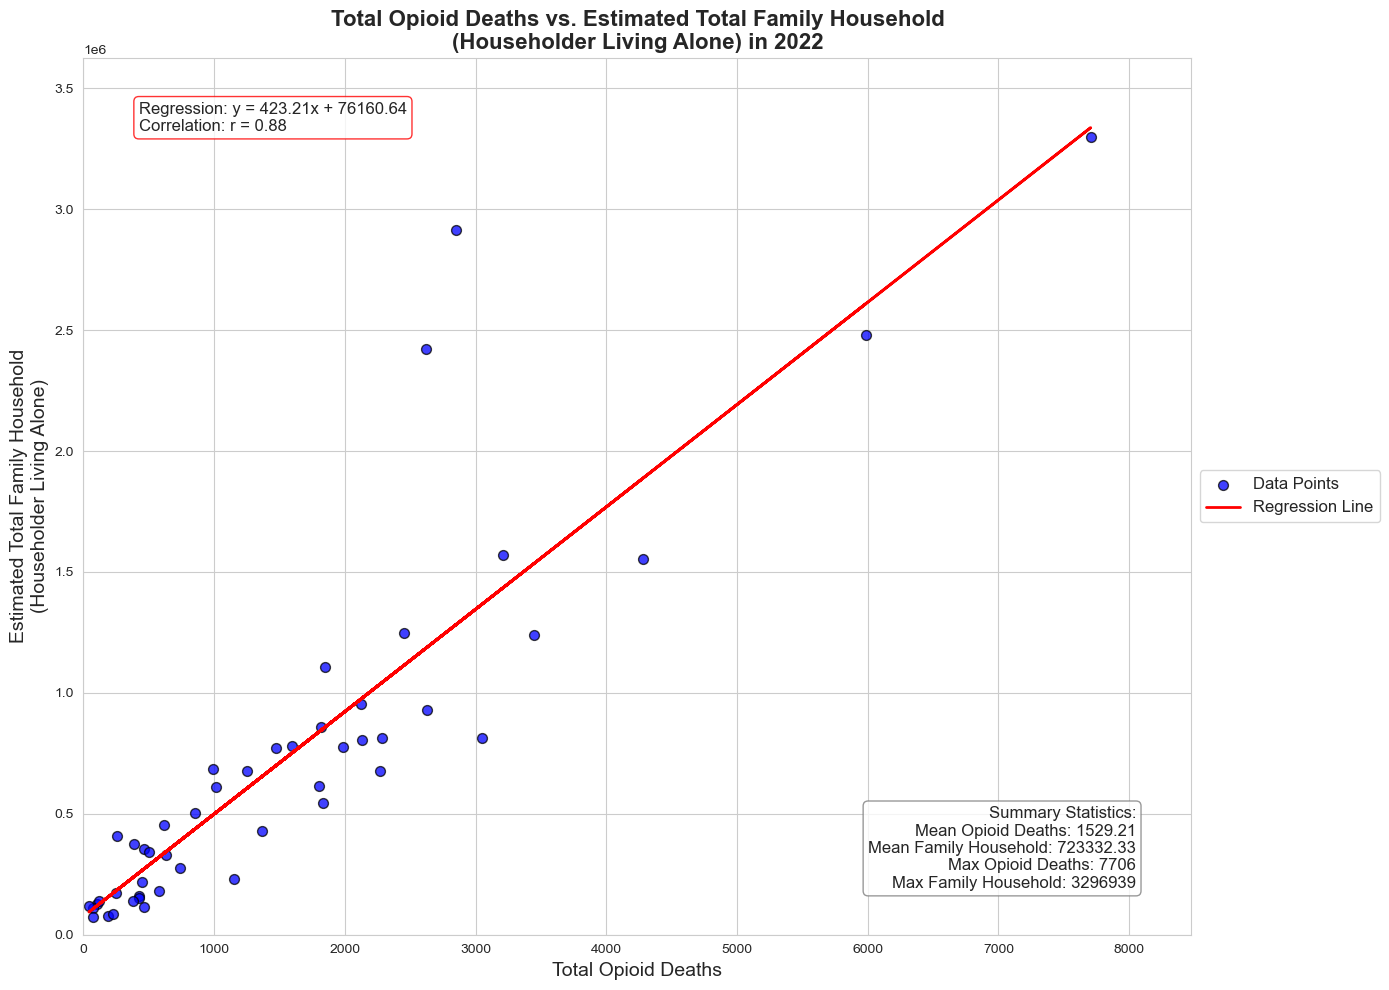


Detailed Summary Statistics:
       Total Opioid Deaths  \
count            48.000000   
mean           1529.211516   
std            1550.146827   
min              41.750000   
25%             424.583333   
50%            1085.305556   
75%            2167.979167   
max            7705.583333   

       Estimated Total Family Household(Householder Living Alone)  
count                                       4.800000e+01           
mean                                        7.233323e+05           
std                                         7.423948e+05           
min                                         7.405400e+04           
25%                                         1.795890e+05           
50%                                         5.241070e+05           
75%                                         8.261055e+05           
max                                         3.296939e+06           


In [28]:
import matplotlib.pyplot as plt
from scipy.stats import linregress, pearsonr
import pandas as pd
import seaborn as sns
 
# Ensure data types and handle missing values
merged_opioid_family_size["Total Opioid Deaths"] = pd.to_numeric(merged_opioid_family_size["Total Opioid Deaths"], errors='coerce')
merged_opioid_family_size["Estimated Total Family Household(Householder Living Alone)"] = pd.to_numeric(merged_opioid_family_size["Estimated Total Family Household(Householder Living Alone)"], errors='coerce')
merged_opioid_family_size = merged_opioid_family_size.dropna(subset=["Total Opioid Deaths", "Estimated Total Family Household(Householder Living Alone)", "Year"])
 
# Filter data for 2022
merged_opioid_family_size_2022 = merged_opioid_family_size[merged_opioid_family_size["Year"] == 2022]
 
x_values = merged_opioid_family_size_2022["Total Opioid Deaths"]
y_values = merged_opioid_family_size_2022["Estimated Total Family Household(Householder Living Alone)"]
 
# Set up the plot style
plt.figure(figsize=(14, 10))
sns.set_style("whitegrid")
 
# Create scatter plot
scatter = plt.scatter(x_values, y_values,
                      marker="o",
                      facecolors="blue",
                      edgecolors="black",
                      s=50,
                      alpha=0.75,
                      label="Data Points")
 
# Calculate regression line
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
 
# Plot regression line
plt.plot(x_values, regress_values, "r-", linewidth=2, label="Regression Line")
 
# Calculate correlation coefficient
corr_coef, _ = pearsonr(x_values, y_values)
 
# Set axis limits and labels
plt.ylim(0, y_values.max() * 1.1)
plt.xlim(0, x_values.max() * 1.1)
plt.xlabel("Total Opioid Deaths", fontsize=14)
plt.ylabel("Estimated Total Family Household\n(Householder Living Alone)", fontsize=14)
plt.title("Total Opioid Deaths vs. Estimated Total Family Household\n(Householder Living Alone) in 2022", fontsize=16, fontweight='bold')
 
# Add text box with regression equation and correlation coefficient
stats_text = f"Regression: {line_eq}\nCorrelation: r = {corr_coef:.2f}"
plt.text(0.05, 0.95, stats_text,
         transform=plt.gca().transAxes,
         fontsize=12,
         verticalalignment='top',
         bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="red", alpha=0.8))
 
# Add text box with summary statistics
summary_stats = f"Summary Statistics:\n" \
                f"Mean Opioid Deaths: {x_values.mean():.2f}\n" \
                f"Mean Family Household: {y_values.mean():.2f}\n" \
                f"Max Opioid Deaths: {x_values.max():.0f}\n" \
                f"Max Family Household: {y_values.max():.0f}"
 
plt.text(0.95, 0.05, summary_stats,
         horizontalalignment='right',
         verticalalignment='bottom',
         transform=plt.gca().transAxes,
         fontsize=12,
         bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))
 
# Improve legend and position it outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
 
# Adjust layout to prevent overlapping
plt.tight_layout()
 
# Show plot
plt.show()
 
# Print detailed summary statistics
print("\nDetailed Summary Statistics:")
print(merged_opioid_family_size_2022[["Total Opioid Deaths", "Estimated Total Family Household(Householder Living Alone)"]].describe())

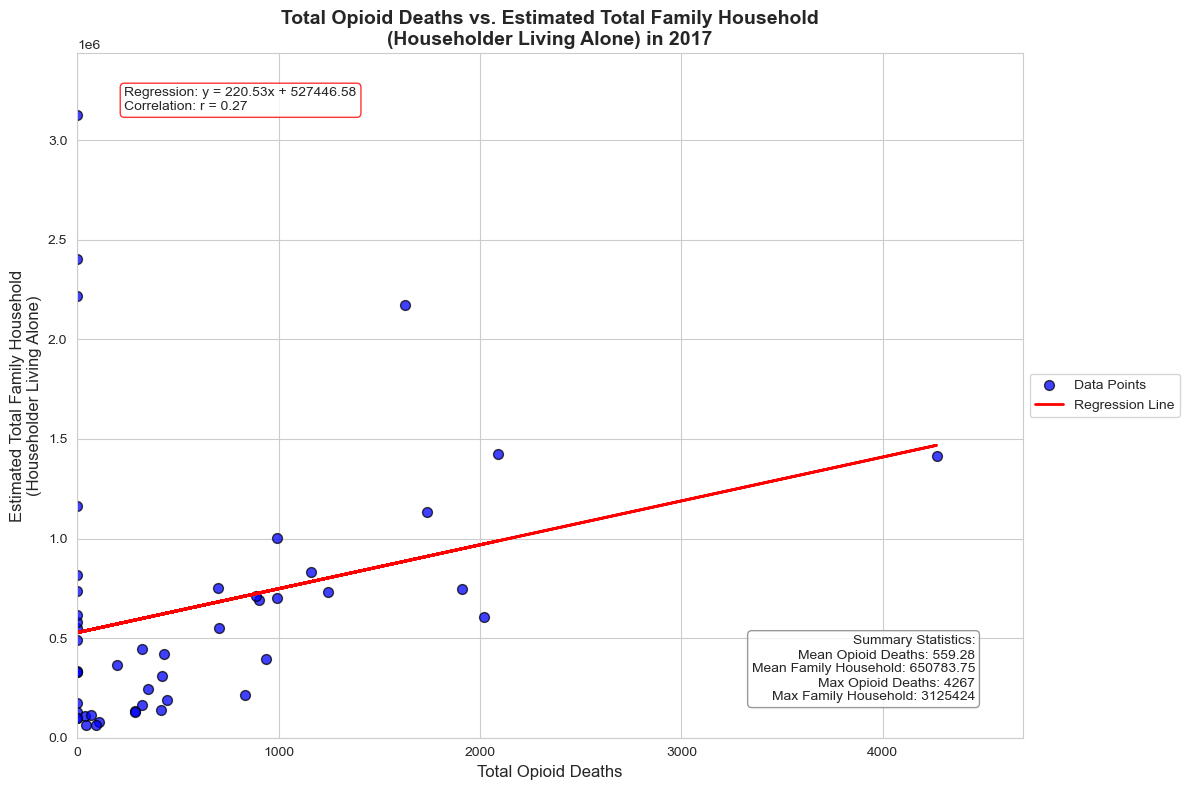


Detailed Summary Statistics for 2017:
       Total Opioid Deaths  \
count            48.000000   
mean            559.282035   
std             815.848308   
min               0.000000   
25%               0.000000   
50%             287.583333   
75%             890.497024   
max            4266.750000   

       Estimated Total Family Household(Householder Living Alone)  
count                                       4.800000e+01           
mean                                        6.507838e+05           
std                                         6.669479e+05           
min                                         6.350400e+04           
25%                                         1.699645e+05           
50%                                         4.685085e+05           
75%                                         7.476298e+05           
max                                         3.125424e+06           




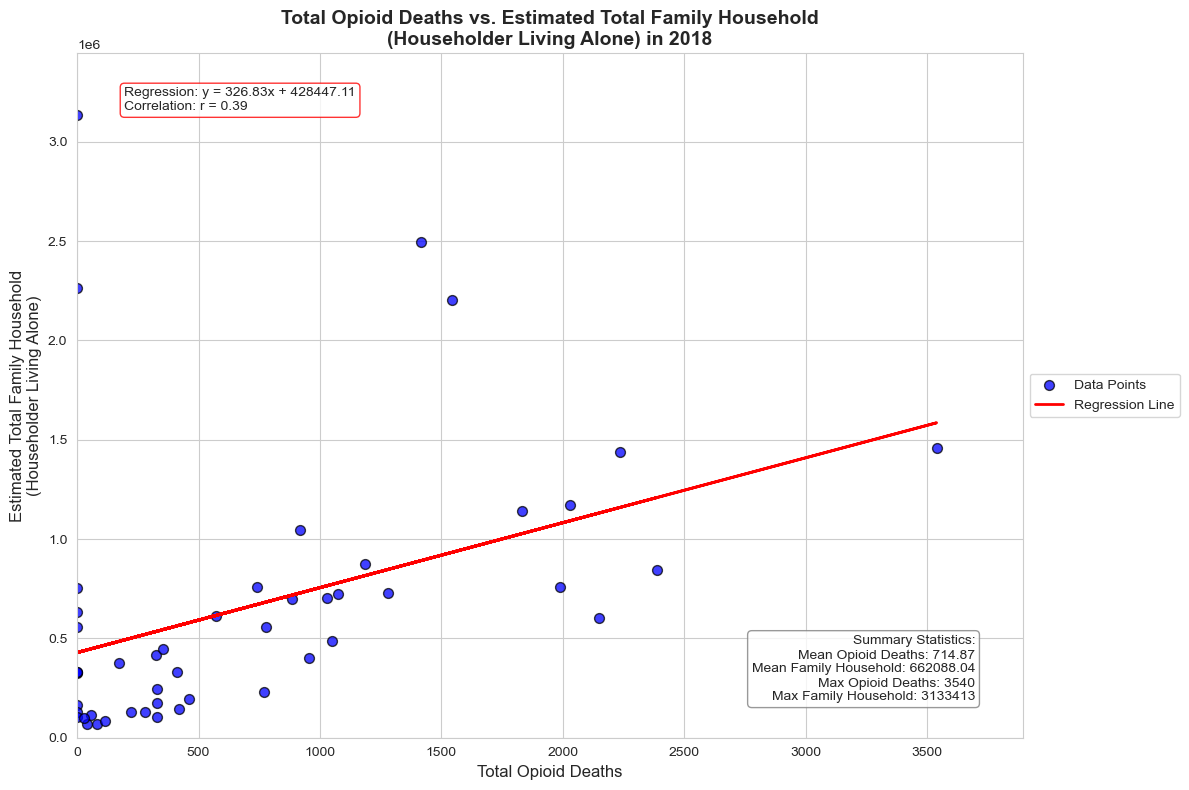


Detailed Summary Statistics for 2018:
       Total Opioid Deaths  \
count            48.000000   
mean            714.867436   
std             817.515822   
min               0.000000   
25%              38.437500   
50%             383.000000   
75%            1054.218182   
max            3540.000000   

       Estimated Total Family Household(Householder Living Alone)  
count                                       4.800000e+01           
mean                                        6.620880e+05           
std                                         6.783278e+05           
min                                         6.625300e+04           
25%                                         1.723935e+05           
50%                                         4.674500e+05           
75%                                         7.590068e+05           
max                                         3.133413e+06           




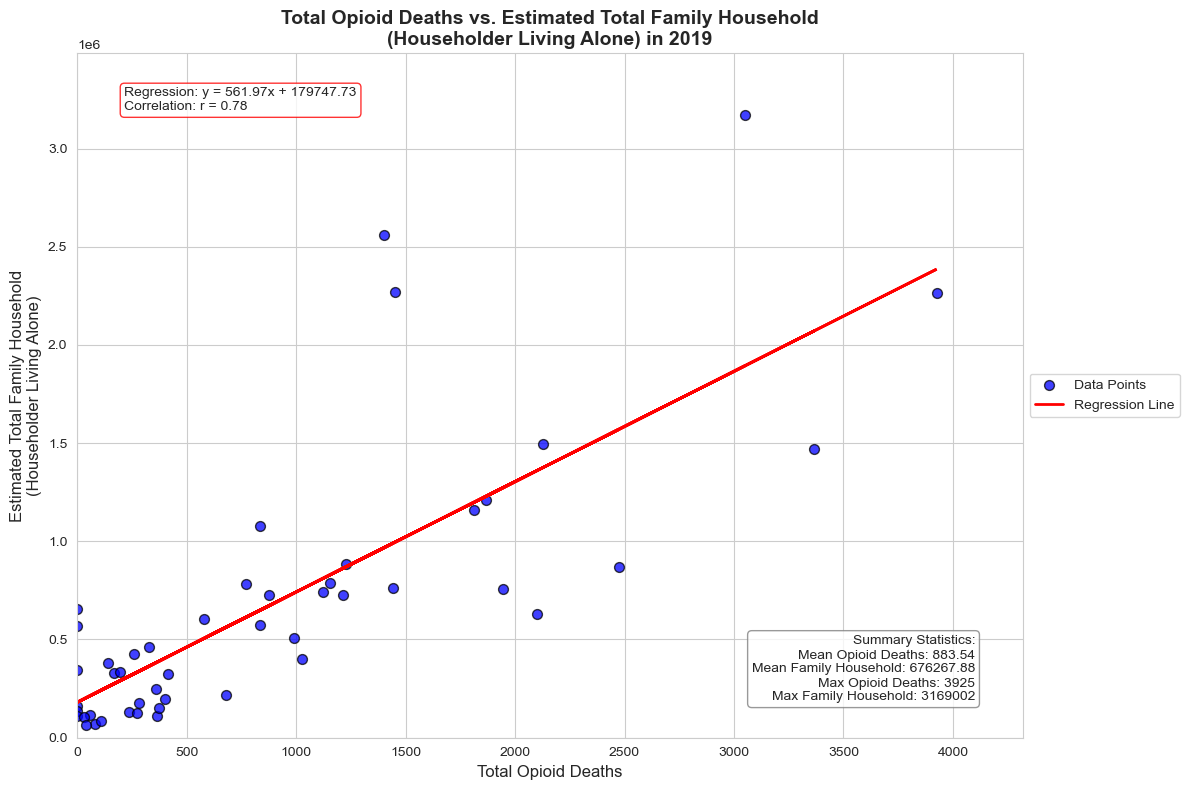


Detailed Summary Statistics for 2019:
       Total Opioid Deaths  \
count            48.000000   
mean            883.542048   
std             953.929746   
min               0.000000   
25%             160.891667   
50%             498.602273   
75%            1271.833333   
max            3925.333333   

       Estimated Total Family Household(Householder Living Alone)  
count                                       4.800000e+01           
mean                                        6.762679e+05           
std                                         6.906900e+05           
min                                         6.393900e+04           
25%                                         1.745992e+05           
50%                                         4.868930e+05           
75%                                         7.830232e+05           
max                                         3.169002e+06           




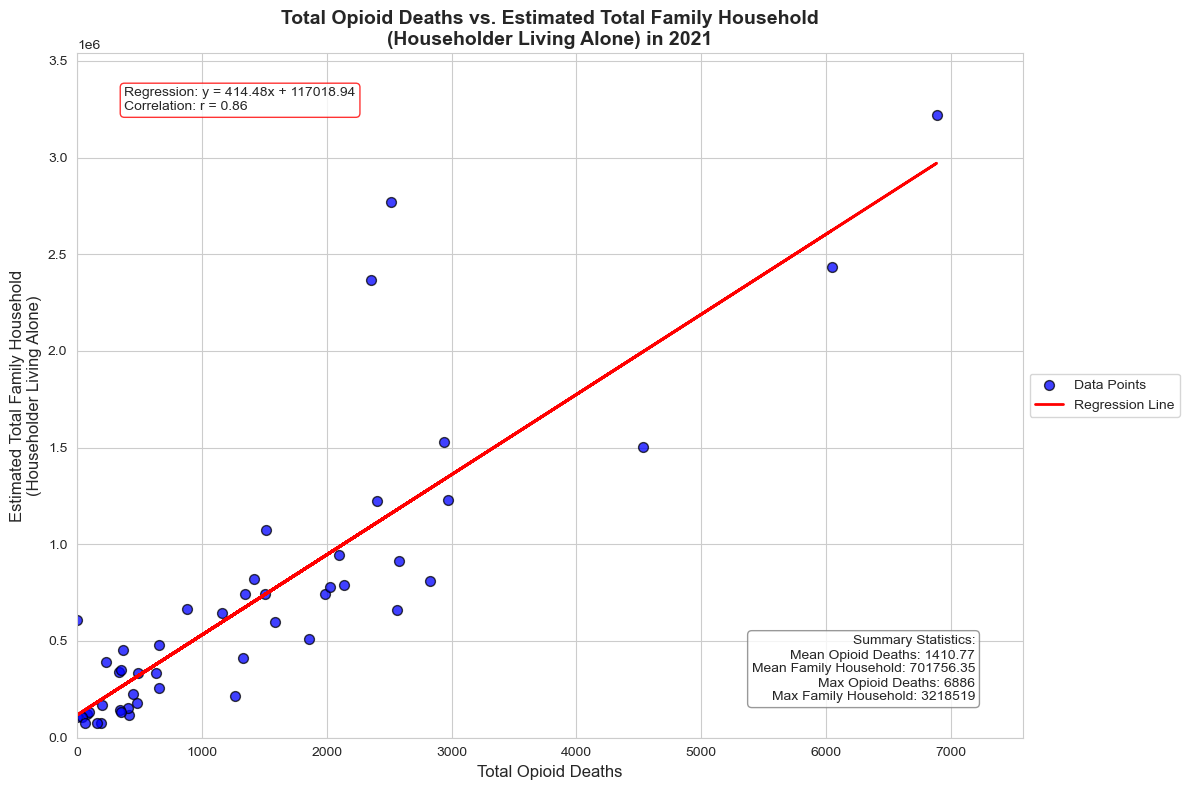


Detailed Summary Statistics for 2021:
       Total Opioid Deaths  \
count            48.000000   
mean           1410.772743   
std            1496.527759   
min               0.000000   
25%             349.104167   
50%            1017.625000   
75%            2106.187500   
max            6885.666667   

       Estimated Total Family Household(Householder Living Alone)  
count                                       4.800000e+01           
mean                                        7.017564e+05           
std                                         7.215318e+05           
min                                         7.508800e+04           
25%                                         1.750688e+05           
50%                                         4.944965e+05           
75%                                         8.108198e+05           
max                                         3.218519e+06           




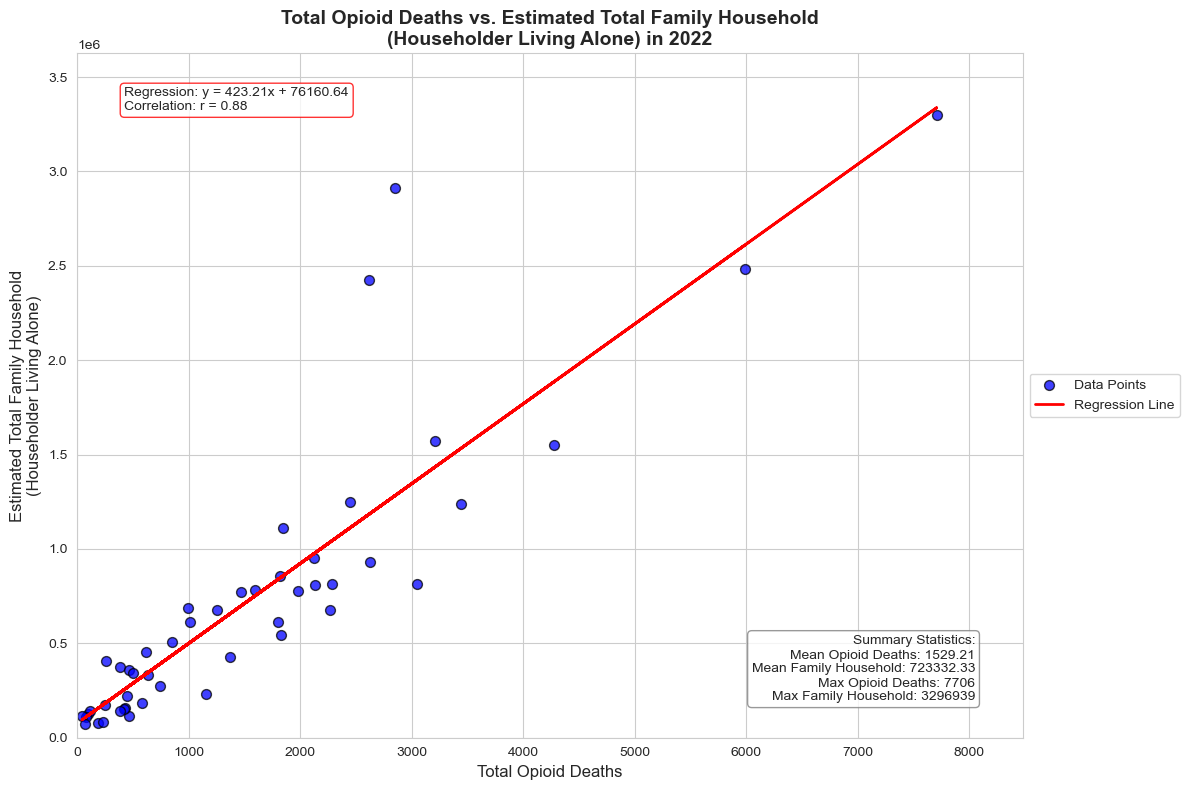


Detailed Summary Statistics for 2022:
       Total Opioid Deaths  \
count            48.000000   
mean           1529.211516   
std            1550.146827   
min              41.750000   
25%             424.583333   
50%            1085.305556   
75%            2167.979167   
max            7705.583333   

       Estimated Total Family Household(Householder Living Alone)  
count                                       4.800000e+01           
mean                                        7.233323e+05           
std                                         7.423948e+05           
min                                         7.405400e+04           
25%                                         1.795890e+05           
50%                                         5.241070e+05           
75%                                         8.261055e+05           
max                                         3.296939e+06           




In [29]:
import matplotlib.pyplot as plt
from scipy.stats import linregress, pearsonr
import pandas as pd
import seaborn as sns
 
# Ensure data types and handle missing values
merged_opioid_family_size["Total Opioid Deaths"] = pd.to_numeric(merged_opioid_family_size["Total Opioid Deaths"], errors='coerce')
merged_opioid_family_size["Estimated Total Family Household(Householder Living Alone)"] = pd.to_numeric(merged_opioid_family_size["Estimated Total Family Household(Householder Living Alone)"], errors='coerce')
merged_opioid_family_size = merged_opioid_family_size.dropna(subset=["Total Opioid Deaths", "Estimated Total Family Household(Householder Living Alone)", "Year"])
 
def create_scatter_plot(year_data, year):
    x_values = year_data["Total Opioid Deaths"]
    y_values = year_data["Estimated Total Family Household(Householder Living Alone)"]
 
    fig, ax = plt.subplots(figsize=(12, 8))
    sns.set_style("whitegrid")
 
    # Create scatter plot
    scatter = ax.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black", s=50, alpha=0.75, label="Data Points")
 
    # Calculate regression line
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    regress_values = slope * x_values + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
 
    # Plot regression line
    ax.plot(x_values, regress_values, "r-", linewidth=2, label="Regression Line")
 
    # Calculate correlation coefficient
    corr_coef, _ = pearsonr(x_values, y_values)
 
    # Set axis limits and labels
    ax.set_ylim(0, y_values.max() * 1.1)
    ax.set_xlim(0, x_values.max() * 1.1)
    ax.set_xlabel("Total Opioid Deaths", fontsize=12)
    ax.set_ylabel("Estimated Total Family Household\n(Householder Living Alone)", fontsize=12)
    ax.set_title(f"Total Opioid Deaths vs. Estimated Total Family Household\n(Householder Living Alone) in {year}", fontsize=14, fontweight='bold')
 
    # Add text box with regression equation and correlation coefficient
    stats_text = f"Regression: {line_eq}\nCorrelation: r = {corr_coef:.2f}"
    ax.text(0.05, 0.95, stats_text, transform=ax.transAxes, fontsize=10, verticalalignment='top',
            bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="red", alpha=0.8))
 
    # Add text box with summary statistics
    summary_stats = f"Summary Statistics:\n" \
                    f"Mean Opioid Deaths: {x_values.mean():.2f}\n" \
                    f"Mean Family Household: {y_values.mean():.2f}\n" \
                    f"Max Opioid Deaths: {x_values.max():.0f}\n" \
                    f"Max Family Household: {y_values.max():.0f}"
    ax.text(0.95, 0.05, summary_stats, horizontalalignment='right', verticalalignment='bottom',
            transform=ax.transAxes, fontsize=10, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))
 
    # Improve legend and position it outside the plot
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)
 
    plt.tight_layout()
    return fig
 
# Create plots for each year
years = [2017, 2018, 2019, 2021, 2022]
for year in years:
    year_data = merged_opioid_family_size[merged_opioid_family_size["Year"] == year]
    fig = create_scatter_plot(year_data, year)
    plt.show()
 
    # Print detailed summary statistics
    print(f"\nDetailed Summary Statistics for {year}:")
    print(year_data[["Total Opioid Deaths", "Estimated Total Family Household(Householder Living Alone)"]].describe())
    print("\n" + "="*50 + "\n")
